In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('titanic.csv')

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.shape

(418, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.isnull().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       244
                                                                                 False  False        87
                                             True   False  False  False   False  True   False        82
                                                                                 False  False         4
                                             False  False  False  False   True   True   False         1
dtype: int64

In [9]:
%matplotlib inline

<Axes: xlabel='Survived', ylabel='count'>

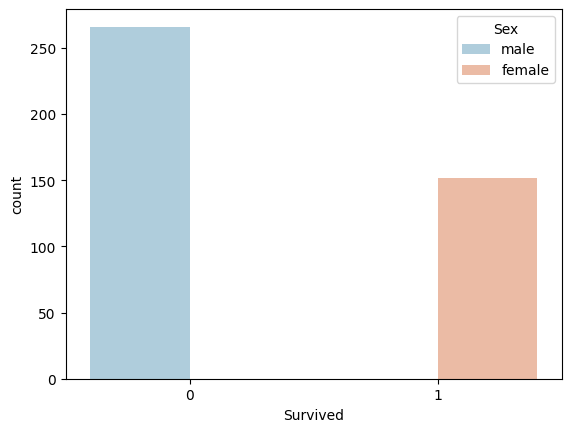

In [10]:
sns.countplot(x='Survived',hue='Sex', data=df, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

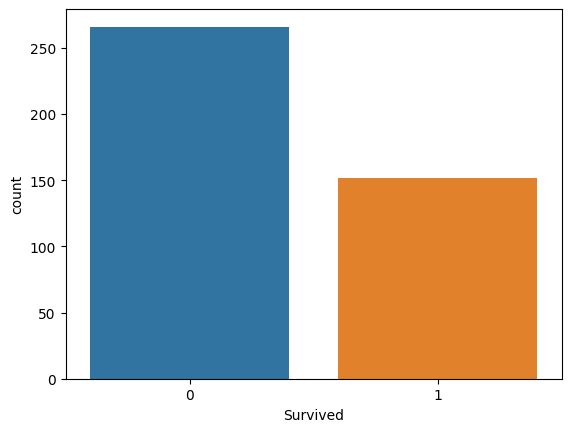

In [11]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

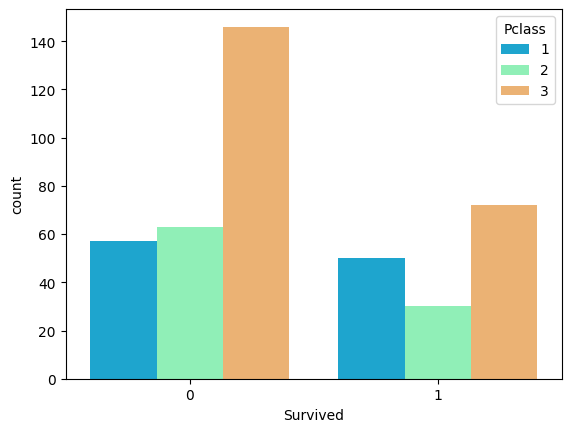

In [12]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<Axes: >

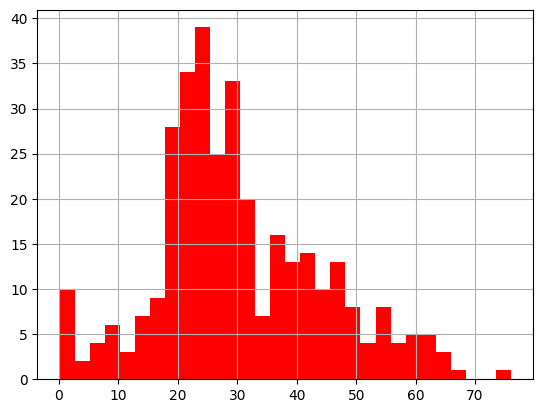

In [13]:
df['Age'].hist(bins=30,color='red')

<Axes: >

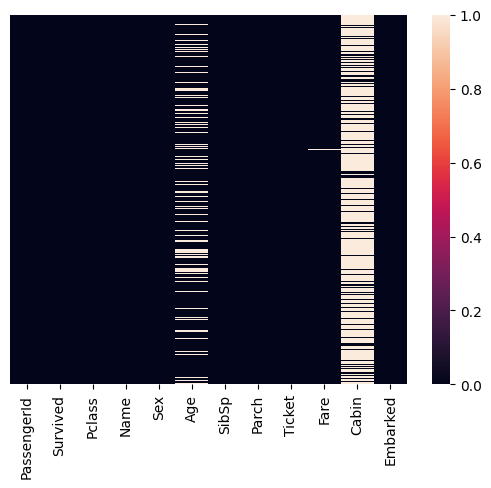

In [14]:
sns.heatmap(df.isnull(), yticklabels=False)

<Axes: xlabel='Pclass', ylabel='Age'>

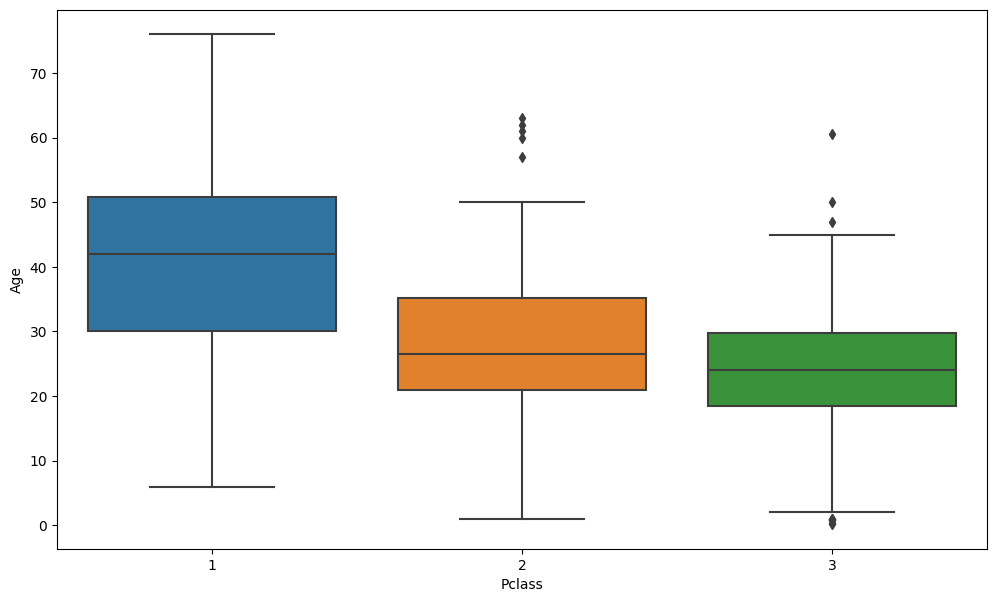

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=df)

In [16]:
df.loc[(df['Pclass'] == 1) & (df['Age'].isnull()), 'Age'] = 37
df.loc[(df['Pclass'] == 2) & (df['Age'].isnull()), 'Age'] = 29
df.loc[(df['Pclass'] == 3) & (df['Age'].isnull()), 'Age'] = 24

In [17]:
df=df.drop(columns='Cabin')

In [18]:
df=df.dropna()

<Axes: >

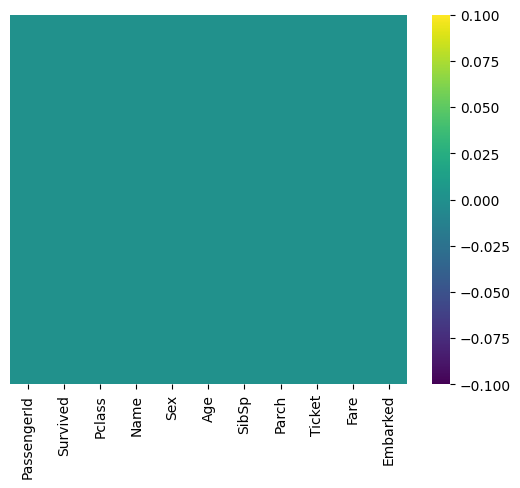

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [20]:
df['Age'] = df['Age'].astype(int)

In [21]:
df['Fare'] = df['Fare'].astype(int)

In [22]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int64
SibSp           int64
Parch           int64
Ticket         object
Fare            int64
Embarked       object
dtype: object

In [23]:
# change object data type to int
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)

In [24]:
df['Sex'] = df['Sex'].map({'male':0,'female':1}).astype(int)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9,0
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12,1


In [26]:
data = df.drop(['PassengerId', 'Name', 'Ticket'], axis= 1, inplace= True)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [28]:
x= df.drop(['Survived'],axis=1)
y= df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy:', acc)

Accuracy: 1.0
